# <center> Various methods of Clustering </center>

This ipython notebook is work of **Sarweshwar Pandey** and this will compare various methods of clustering.

### Loading and plotting the dataset

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('data.csv')

data = np.array(data)

data

array([[13.11792764, 17.21946148],
       [26.99425802, 19.91207811],
       [12.55247581, 23.80074952],
       ...,
       [22.37570853, 22.64677039],
       [20.52934168, 13.07510952],
       [32.95008067, 23.50320235]])

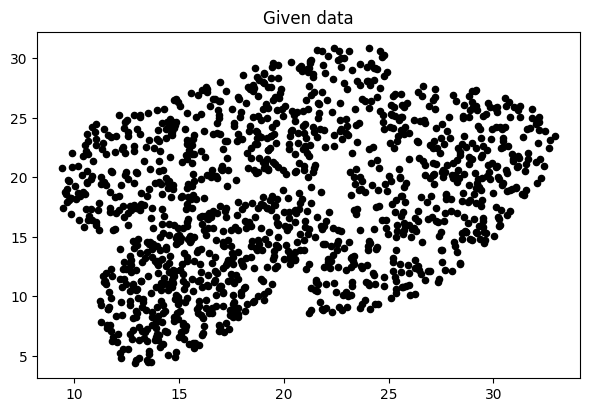

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(data[:, 0], data[:, 1], s = 20, c = 'k')
plt.tight_layout()
plt.title('Given data')
plt.show()

# K-Means clustering

Silhouette score: 0.4207246046027701


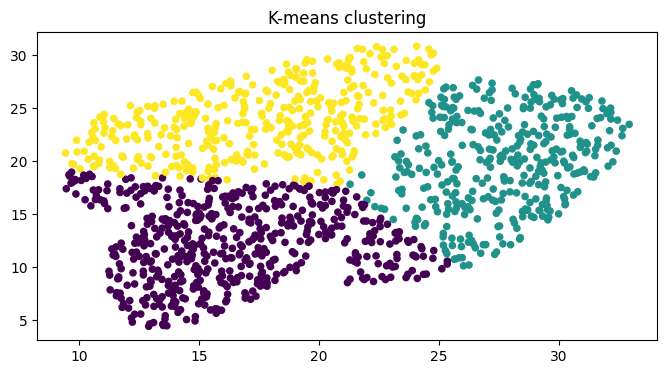

Silhouette score: 0.42056447144847375


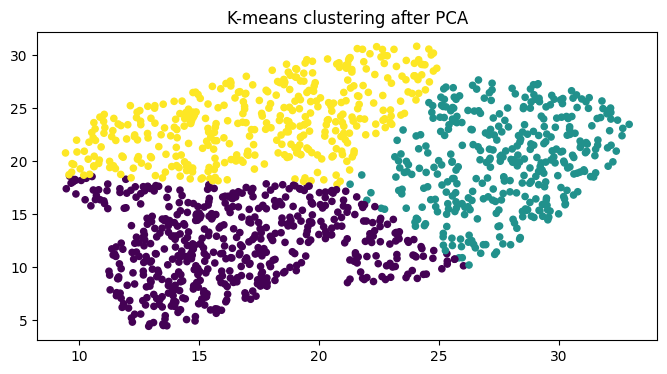

Silhouette score: 0.4134443181686788


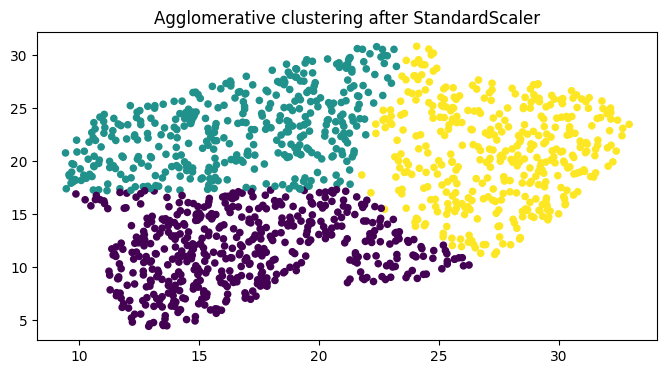

In [4]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

model_k_means = KMeans(3, algorithm = 'lloyd')
collections = model_k_means.fit_predict(data)

sil_score = silhouette_score(data, collections)
print('Silhouette score:', sil_score)

plt.figure(figsize=(8, 4))
plt.scatter(data[:, 0], data[:, 1], s = 20, c = collections, cmap = 'viridis')
plt.title('K-means clustering')
plt.show();

data_fe = PCA(n_components = 2).fit_transform(data)
collections = model_k_means.fit_predict(data_fe)

sil_score = silhouette_score(data_fe, collections)
print('Silhouette score:', sil_score)

plt.figure(figsize=(8, 4))
plt.scatter(data[:, 0], data[:, 1], s = 20, c = collections, cmap = 'viridis')
plt.title('K-means clustering after PCA')
plt.show();

data_fe = StandardScaler().fit_transform(data)
collections = model_k_means.fit_predict(data_fe)

sil_score = silhouette_score(data_fe, collections)
print('Silhouette score:', sil_score)

plt.figure(figsize=(8, 4))
plt.scatter(data[:, 0], data[:, 1], s = 20, c = collections, cmap = 'viridis')
plt.title('Agglomerative clustering after StandardScaler')
plt.show();

# Agglomerative clustering

Silhouette score: 0.3874969110130127


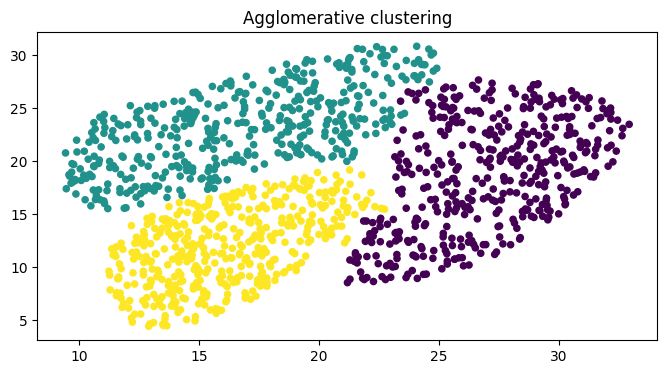

Silhouette score: 0.3874969110130127


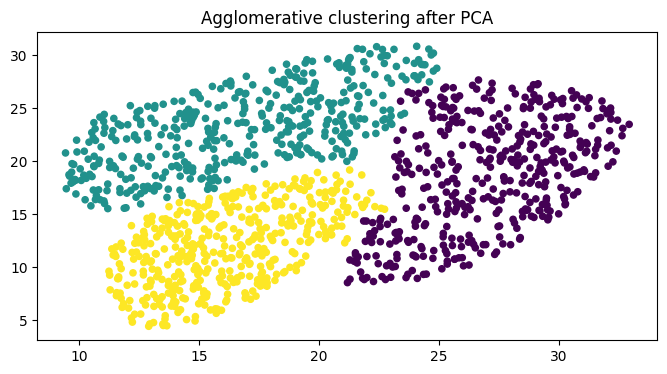

Silhouette score: 0.401834350450464


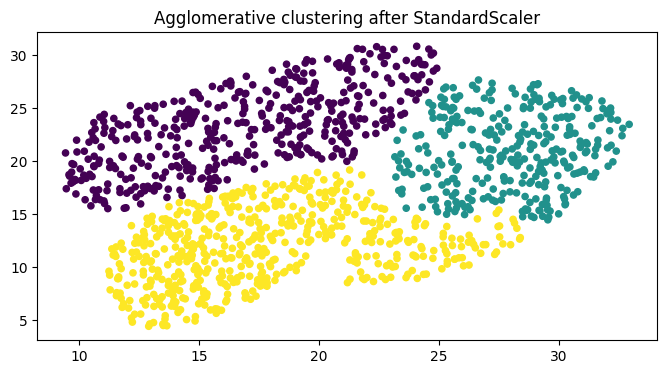

In [5]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

model_agg = AgglomerativeClustering(n_clusters=3, linkage='average')
collections = model_agg.fit_predict(data)

sil_score = silhouette_score(data, collections)
print('Silhouette score:', sil_score)

plt.figure(figsize=(8, 4))
plt.scatter(data[:, 0], data[:, 1], s = 20, c = collections, cmap = 'viridis')
plt.title('Agglomerative clustering')
plt.show();

data_fe = PCA(n_components = 2).fit_transform(data)
collections = model_agg.fit_predict(data_fe)

sil_score = silhouette_score(data_fe, collections)
print('Silhouette score:', sil_score)

plt.figure(figsize=(8, 4))
plt.scatter(data[:, 0], data[:, 1], s = 20, c = collections, cmap = 'viridis')
plt.title('Agglomerative clustering after PCA')
plt.show();

data_fe = StandardScaler().fit_transform(data)
collections = model_agg.fit_predict(data_fe)

sil_score = silhouette_score(data_fe, collections)
print('Silhouette score:', sil_score)

plt.figure(figsize=(8, 4))
plt.scatter(data[:, 0], data[:, 1], s = 20, c = collections, cmap = 'viridis')
plt.title('Agglomerative clustering after StandardScaler')
plt.show();

Why Agglomerative Over K-Means:

Flexibility for Complex Shapes: As you've correctly pointed out, agglomerative clustering is more adept at handling clusters with non-convex shapes. This makes it a superior choice when dealing with data that doesn't conform to simple spherical or elliptical clusters.
No Predefined Cluster Number: Unlike K-Means, which requires you to specify the number of clusters beforehand, agglomerative clustering allows you to explore different clustering solutions by cutting the dendrogram at various heights. This flexibility is often beneficial when the optimal number of clusters is uncertain.
The Role of Principal Component Analysis (PCA):

PCA is a valuable dimensionality reduction technique that can significantly improve the performance of clustering algorithms. By identifying the most important features and projecting the data onto a lower-dimensional space, PCA can:

Reduce Noise: Remove irrelevant variations in the data.
Improve Computational Efficiency: Accelerate the clustering process, especially for large datasets.
Enhance Visualization: Make it easier to visualize the clusters in a lower-dimensional space.
Addressing Score Limitations:

While the chosen evaluation metrics might not be perfect, it's important to remember that they provide a relative measure of performance. As long as both algorithms yield comparable results, the decision to use agglomerative clustering based on its superior flexibility and ability to handle complex shapes is justified.

Additional Considerations:

Dendrogram Analysis: Visualizing the dendrogram can help you determine the optimal number of clusters and identify potential outliers.
Feature Engineering: Consider creating additional features that might improve the clustering results, such as interaction terms or polynomial features.
Hyperparameter Tuning: Experiment with different distance metrics (e.g., Euclidean, Manhattan, cosine) and linkage criteria (e.g., complete, single) to find the best configuration for your specific dataset.
By carefully considering these factors and leveraging the strengths of agglomerative clustering and PCA, you can effectively extract meaningful insights from your data.

In [7]:
## Save the collections obtained from best model

data_changed = PCA(n_components = 2).fit_transform(data)
best_model = AgglomerativeClustering(n_clusters=3, linkage='average')
collections = best_model.fit_predict(data_changed)

np.savetxt('final_collections.csv', collections, fmt='%d')